In [1]:

spark

In [6]:
    
from pyspark.sql import HiveContext
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL Model") \
        .config("spark.driver.extraClassPath", "C:\spark\spark-2.4.0-bin-hadoop2.7\spark-2.4.0-bin-hadoop2.7\jars\sqljdbc42.jar") \
        .getOrCreate()

Transactions_1 = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:sqlserver://se1-dbd-sql-008:1433;database=zasmtstack") \
    .option("dbtable", "(select m.TransID, m.FIPS, m.State, m.County,m.DataclassStndcode, m.RecordTypeStndCode, \
                        m.Recordingdate, m.DocumentTypeStndCode,m.SalesPriceAmount, m.SalesPriceAmountStndCode,\
                        m.AssessmentLandUseStndCode,m.ZVendorStndCode, p.AssessorParcelNumber,p.ImportParcelID,\
                        p.OriginalPropertyFullStreetAddress, p.PropertyFullStreetAddress\
                        from ztrans.ztrans.utmain m with(index([XIE_Main_TransID])) \
                        left join ztrans.ztrans.utPropertyInfo p with (index([temp_transID]))\
                        on m.transid = p.TransId where m.fips = '08069'\
                        and m.salespriceamount > 0 and m.DataClassStndCode = 'D' and m.AssessmentLandUseStndCode like 'R%'\
                        ) AS Transactions") \
    .option("user", "Preethim") \
    .option("password", "Preethi!") \
    .option("fetchsize", 10)\
    .load() 

Transactions_2 = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:sqlserver://se1-dbd-sql-008:1433;database=zasmtstack") \
    .option("dbtable", "(select m.TransID, m.FIPS, m.State, m.County,m.DataclassStndcode, m.RecordTypeStndCode, \
                        m.Recordingdate, m.DocumentTypeStndCode,m.SalesPriceAmount, m.SalesPriceAmountStndCode,\
                        m.AssessmentLandUseStndCode,m.ZVendorStndCode, p.AssessorParcelNumber,p.ImportParcelID,\
                        p.OriginalPropertyFullStreetAddress, p.PropertyFullStreetAddress\
                        from ztrans.ztrans.utmain m with(index([XIE_Main_TransID])) \
                        left join ztrans.ztrans.utPropertyInfo p with (index([temp_transID]))\
                        on m.transid = p.TransId where m.fips = '08077'\
                        and m.salespriceamount > 0 and m.DataClassStndCode = 'D' and m.AssessmentLandUseStndCode like 'R%'\
                        ) AS Transactions") \
    .option("user", "Preethim") \
    .option("password", "Preethi!") \
    .option("fetchsize", 10)\
    .load()    
#df = spark.read.jdbc("jdbc:sqlserver://se1-dbd-sql-008:1433;database=zasmtstack;user=Preethim;password=Preethi!","zasmt.utpool")
Transactions_1.first()
Transactions_2.first()



Row(TransID=106714601, FIPS='08077', State='CO', County='MESA', DataclassStndcode='D', RecordTypeStndCode='P', Recordingdate=datetime.date(1996, 7, 1), DocumentTypeStndCode='WRDE', SalesPriceAmount=Decimal('176000.0000'), SalesPriceAmountStndCode='RD', AssessmentLandUseStndCode='RR101', ZVendorStndCode='BKF', AssessorParcelNumber='2945-032-19-006', ImportParcelID=23520753, OriginalPropertyFullStreetAddress=None, PropertyFullStreetAddress='2544 MOONRIDGE DR')

In [7]:
print (Transactions_1.count())

44609


In [8]:
sales_max_value = Transactions_1.agg({"SalesPriceAmount": "max"}).collect()[0][0]
sales_min_value = Transactions_2.agg({"SalesPriceAmount": "min"}).collect()[0][0]
print (sales_max_value)
print(sales_min_value)

39000000.0000
103.0000


In [25]:
def getSales(decimal_sales):
    sales = []

    for each in decimal_sales:
        Integer = int(each[0])
        sales.append(Integer)
    sales=sorted(sales)
    return(sales)

AttributeError: 'Axes' object has no attribute 'scatterplot'

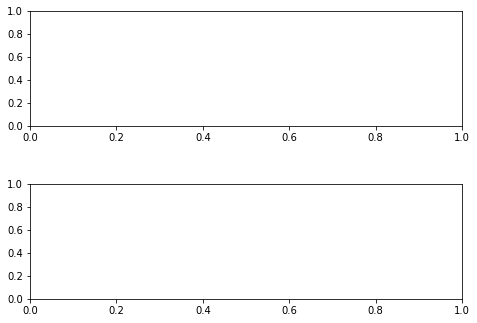

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

#decimal_sales = Transactions.select("SalesPriceAmount").collect()
sales_1 = getSales(Transactions_1.select("SalesPriceAmount").collect())
sales_2 = getSales(Transactions_2.select("SalesPriceAmount").collect())


l1 = [i for i in range(len(sales_1)-2)]
l2 =  [i for i in range(len(sales_2)-2)]
fig = plt.figure()
ax1 = fig.add_axes([0,0.6,1,.4])
ax2 = fig.add_axes([0,0,1,.4])

ax1.scatterplot(l1,sales_08069[:44500])
ax2.scatterplot(l2,sales_16027[:29000])
plt.show()

In [ ]:
import matplotlib
matplotlib.is_interactive()

%matplotlib --list

In [ ]:
len(sales)